# Self organizing map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os as os

# Prettier plots
sns.set()

In [2]:
class SelfOrganizingMap(object):
    def __init__(self, n_neurons, n_inputs, init_neurons=None):
        # Initialize with random small values
        if init_neurons is None:
            self.neurons = np.random.random((n_neurons, n_inputs))
        else:
            self.neurons = init_neurons

    def winning_neuron(self, x):
        distances = []
        for j in range(self.neurons.shape[0]):
            distances.append(np.linalg.norm(x - self.neurons[j]))
        return np.argmin(distances)
    
    def train(self, inputs, learningRate):
        # Draw a sample from input
        for i in np.random.permutation(inputs.shape[0]):
            x = inputs[i]
            
            # Find the best matching neuron
            wNInd = self.winning_neuron(x)
            
            # Store old weights
            oldNeurons = np.copy(self.neurons)
            
            # Adjust synaptic weights 
            self.update(x, wNInd, learning_rate)
            
            # Stopping criterion
            if (self.stop(oldNeurons)):
                break
            
    def update(self, x, winning_neuron_ind, learning_rate):
        for j in range(self.neurons.shape[0]):
            self.neurons[j] += learning_rate * self.neighborhood_function(winning_neuron_ind, j) * (x - self.neurons[j])
    
    def neighborhood_function(self, winning_neuron_ind, j):
        return int(winning_neuron_ind == j)
    
    def stop(self, old_neurons):
        return np.linalg.norm(old_neurons - self.neurons)**2 < 0.01
    
    def clustering(self, inputs):
        c = []
        for i in range(inputs.shape[0]):
            c.append([s.winning_neuron(inputs[i])])
        return np.array(c)

In [3]:
# General stuff
inputs = np.array([[0.1],
                   [0.2],
                   [0.4],
                   [0.5]])

n_nodes = 2
learning_rate = 0.1

In [4]:
# Lower weights
w1 = 0.15
w2 = 0.45
init_neurons0 = np.array([[w1], [w2]])

s = SelfOrganizingMap(n_nodes, inputs.shape[1], init_neurons0)
s.train(inputs, learning_rate)
print(s.clustering(inputs))

[[0]
 [0]
 [1]
 [1]]


In [5]:
# Higher weights
w1 = 0.3
w2 = 0.9
init_neurons1 = np.array([[w1], [w2]])

s = SelfOrganizingMap(n_nodes, inputs.shape[1], init_neurons1)
s.train(inputs, learning_rate)
print(s.clustering(inputs))

[[0]
 [0]
 [0]
 [0]]


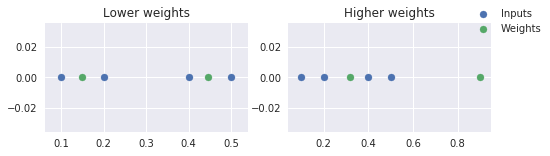

In [6]:
fig, arr = plt.subplots(1, 2, figsize=(8,2))

arr[0].scatter(inputs, np.zeros(len(inputs)))
arr[0].scatter(init_neurons0, np.zeros(len(init_neurons0)))
arr[0].set_title("Lower weights")

arr[1].scatter(inputs, np.zeros(len(inputs)), label="Inputs")
arr[1].scatter(init_neurons1, np.zeros(len(init_neurons1)), label="Weights")
arr[1].set_title("Higher weights")
fig.legend()
plt.show()

In [7]:
# Generate starting positions
def circle_points(n_points, origin, radius):
    t = np.linspace(np.pi, -np.pi, n_points + 1)
    t = t[0:-1] # Remove duplicate
    x = np.cos(t) * radius + origin[0]
    y = np.sin(t) * radius + origin[1]
    x = np.expand_dims(x, 1)
    y = np.expand_dims(y, 1)
    return np.append(x,y,1)

In [8]:
# Cities
stralsund = [13.07703, 54.30907]
greifswald = [13.39234, 54.08655]
neubrandenburg = [13.27793, 53.56783]
schwerin = [11.40125, 53.63550]
wismar = [11.45160, 53.89794]
rostock = [12.09915, 54.09244]
cities = np.array(["Stralsund", "Greifswald", "Neubrandenburg", "Schwerin", "Wismar", "Rostock"])

inputs = np.array([stralsund, greifswald, neubrandenburg, schwerin, wismar, rostock])
# Normalize inputs
inputs[:,0] = (inputs[:,0]-np.min(inputs[:,0]))/(np.max(inputs[:,0])-np.min(inputs[:,0]))
inputs[:,1] = (inputs[:,1]-np.min(inputs[:,1]))/(np.max(inputs[:,1])-np.min(inputs[:,1]))

In [9]:
# Parameters
n_epochs = 200
learning_rate = 0.1
n_extra_nodes = 3
origin = [0.5, 0.5]
radius = 0.3
init_weights = circle_points(inputs.shape[0] + n_extra_nodes, origin, radius)

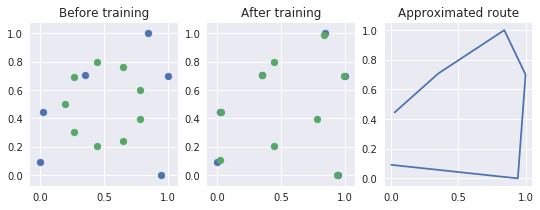

Shortest route: ['Wismar' 'Rostock' 'Stralsund' 'Greifswald' 'Neubrandenburg' 'Schwerin']


In [10]:
s = SelfOrganizingMap(inputs.shape[0] + n_extra_nodes, inputs.shape[1], init_weights)

# Plot the positions before and after training
fig, arr = plt.subplots(1, 3, figsize=(9,3))
arr[0].scatter(inputs[:,0], inputs[:,1])
arr[0].scatter(s.neurons[:,0], s.neurons[:,1])
arr[0].set_title("Before training")
for i in range(n_epochs):
    s.train(inputs, learning_rate)
arr[1].scatter(inputs[:,0], inputs[:,1])
arr[1].scatter(s.neurons[:,0], s.neurons[:,1])
arr[1].set_title("After training")

# Get the route
pairs = np.append(s.clustering(inputs), np.mgrid[0:inputs.shape[0], :1][0], 1)
route = pairs[pairs[:,0].argsort()][:,1]

# Plot the route
arr[2].plot(inputs[route][:,0], inputs[route][:,1])
arr[2].set_title("Approximated route")
plt.show()
print("Shortest route:", cities[route])

### Testing with data taken from [TSPLIB](http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/index.html)

In [11]:
# Import dataset
datasets_folder = "som_data"
datasets = ["bayg29", "a280", "att48"]

# Parameters
n_epochs = 10000
learning_rate = 0.1
n_extra_nodes = 10
origin = [0.5, 0.5]
radius = 0.3

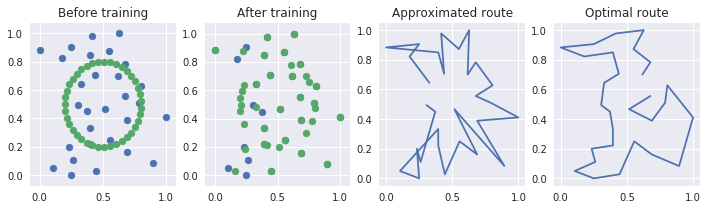

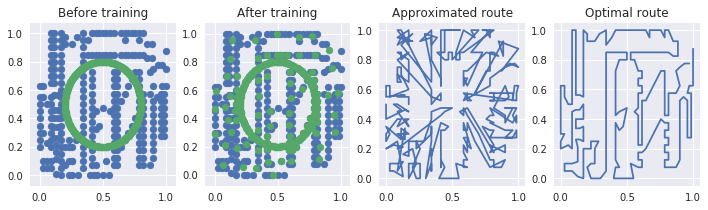

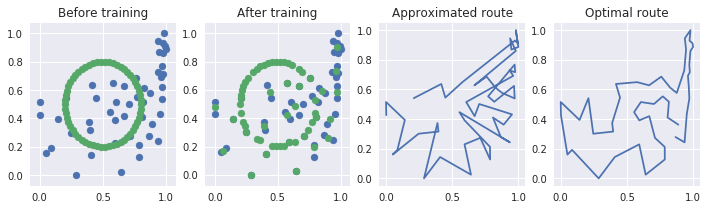

In [12]:
for dataset in datasets:
    inputs = np.loadtxt(os.path.join(datasets_folder, dataset + ".tsp"))[:,1:3]
    optimal_route = np.loadtxt(os.path.join(datasets_folder, dataset + ".opt.tour"), dtype=int)-1

    init_weights = circle_points(inputs.shape[0] + n_extra_nodes, origin, radius)

    # Normalize inputs
    inputs[:,0] = (inputs[:,0]-np.min(inputs[:,0]))/(np.max(inputs[:,0])-np.min(inputs[:,0]))
    inputs[:,1] = (inputs[:,1]-np.min(inputs[:,1]))/(np.max(inputs[:,1])-np.min(inputs[:,1]))

    s = SelfOrganizingMap(inputs.shape[0] + n_extra_nodes, inputs.shape[1], init_weights)

    # Plot the positions before and after training
    fig, arr = plt.subplots(1, 4, figsize=(12,3))
    arr[0].scatter(inputs[:,0], inputs[:,1], label="")
    arr[0].scatter(s.neurons[:,0], s.neurons[:,1])
    arr[0].set_title("Before training")
    for i in range(n_epochs):
        s.train(inputs, learning_rate)
    arr[1].scatter(inputs[:,0], inputs[:,1])
    arr[1].scatter(s.neurons[:,0], s.neurons[:,1])
    arr[1].set_title("After training")

    # Get the route
    pairs = np.append(s.clustering(inputs), np.mgrid[0:inputs.shape[0], :1][0], 1)
    route = pairs[pairs[:,0].argsort()][:,1]

    # Plot the routes
    arr[2].plot(inputs[route][:,0], inputs[route][:,1])
    arr[2].set_title("Approximated route")
    arr[3].plot(inputs[optimal_route][:,0], inputs[optimal_route][:,1])
    arr[3].set_title("Optimal route")
    plt.show()